In [2]:
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.grid_search import GridSearchCV

import matplotlib
import matplotlib.pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
from sklearn.metrics import r2_score

In [4]:
import sys
sys.path.append('../lib')

import XgbAdjustmentHelper as xgbhelper
import SklearnModelCurve as curve_helper

In [5]:
munged_train_df = pd.read_csv('../data/offline/train.csv', index_col=0)
munged_test_df = pd.read_csv('../data/offline/test.csv', index_col=0)
y_train_df = pd.read_csv('../data/offline/y_train.csv', index_col=0)

X_train, X_test, y_train, y_test = train_test_split(munged_train_df.values, y_train_df.values, test_size=0.5, random_state=1729)
X_all_train = munged_train_df.values
y_all_train = y_train_df['y'].values

In [6]:
feature_names = munged_train_df.columns


 cv_result
    test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0        90.589320       1.242355        90.594174        0.295614
1        81.632959       1.204437        81.632526        0.276648
2        73.579323       1.177034        73.577766        0.258447
3        66.332928       1.150968        66.330982        0.242109
4        59.826955       1.126503        59.825346        0.229328
5        53.968622       1.122323        53.972611        0.211312
6        48.711881       1.118418        48.712897        0.198549
7        43.989686       1.111824        43.989332        0.186309
8        39.744823       1.116976        39.744674        0.167719
9        35.956677       1.111595        35.948662        0.164182
10       32.552180       1.115187        32.542226        0.157072
11       29.509965       1.120828        29.499651        0.156121
12       26.784117       1.136753        26.772330        0.148905
13       24.357365       1.150198        24.335233

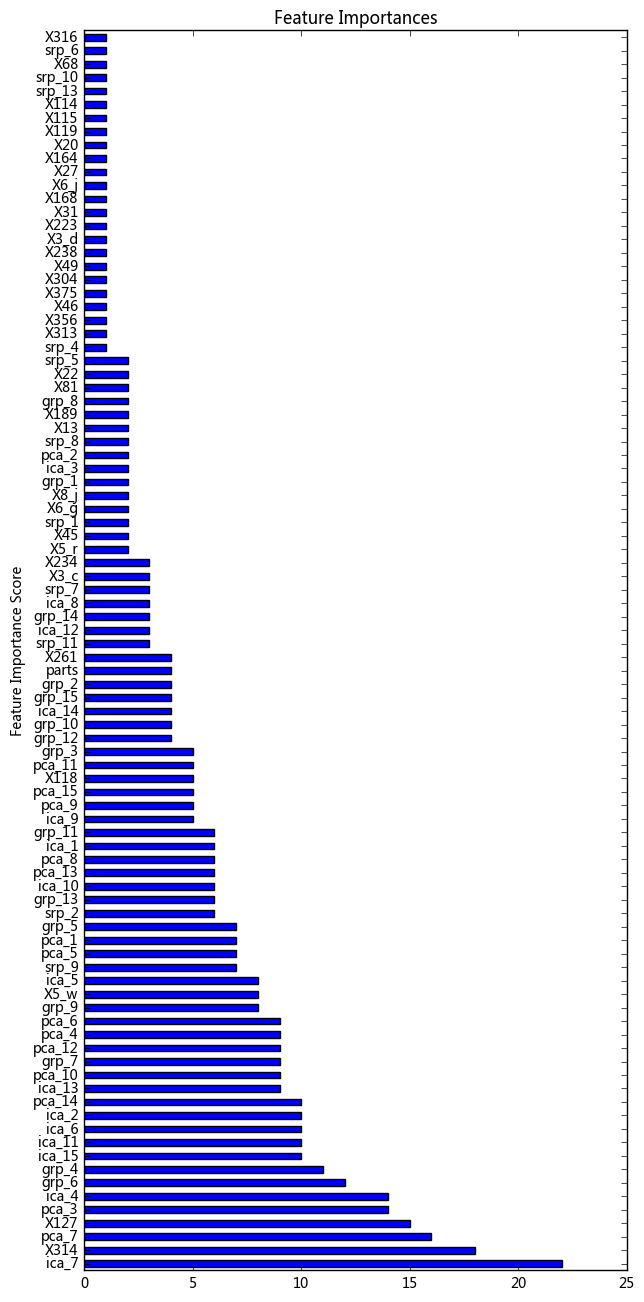

In [6]:
xgb_model = xgb.XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=5000,
                             silent=False, objective='reg:linear', subsample=0.8,
                             colsample_bytree=0.8, gamma=0, min_child_weight = 1,
                             scale_pos_weight=1, seed=27)

feat_data = xgbhelper.ModelFit(xgb_model, feature_names, X_train, y_train, X_test, y_test, 13)
plt.show()

In [10]:
xgb_model = xgb.XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=100,\
                             silent=False, objective='reg:linear', subsample=0.8,\
                             colsample_bytree=0.8, gamma=0, min_child_weight = 5,\
                             scale_pos_weight=1, seed=27)

params2 = {
 'max_depth':[4],
 'min_child_weight':[7, 8, 9, 10]
}
search = xgbhelper.ModelParamSearch(xgb_model, params2, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.53674, std: 0.07017, params: {'max_depth': 4, 'min_child_weight': 7}
mean: 0.53856, std: 0.07182, params: {'max_depth': 4, 'min_child_weight': 8}
mean: 0.53783, std: 0.06754, params: {'max_depth': 4, 'min_child_weight': 9}
mean: 0.53479, std: 0.06673, params: {'max_depth': 4, 'min_child_weight': 10}

best_params
{'max_depth': 4, 'min_child_weight': 8}

best_score
0.5385586511289719


In [7]:
xgb_model = xgb.XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=100,\
                             silent=False, objective='reg:linear', subsample=1,\
                             colsample_bytree=0.85, gamma=0, min_child_weight = 8,\
                             scale_pos_weight=1, seed=27)

params3 = {
 'subsample':[i/100.0 for i in range(70, 105, 10)],
 'colsample_bytree':[i/100.0 for i in range(85, 105, 10)]
}
search = xgbhelper.ModelParamSearch(xgb_model, params3, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.53409, std: 0.06644, params: {'subsample': 0.7, 'colsample_bytree': 0.85}
mean: 0.53535, std: 0.06797, params: {'subsample': 0.8, 'colsample_bytree': 0.85}
mean: 0.53743, std: 0.06717, params: {'subsample': 0.9, 'colsample_bytree': 0.85}
mean: 0.54434, std: 0.06830, params: {'subsample': 1.0, 'colsample_bytree': 0.85}
mean: 0.53186, std: 0.06719, params: {'subsample': 0.7, 'colsample_bytree': 0.95}
mean: 0.53297, std: 0.06967, params: {'subsample': 0.8, 'colsample_bytree': 0.95}
mean: 0.53717, std: 0.06739, params: {'subsample': 0.9, 'colsample_bytree': 0.95}
mean: 0.54047, std: 0.06940, params: {'subsample': 1.0, 'colsample_bytree': 0.95}

best_params
{'subsample': 1.0, 'colsample_bytree': 0.85}

best_score
0.5443426819770122


In [9]:
xgb_model = xgb.XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=100,\
                             silent=False, objective='reg:linear', subsample=1,\
                             colsample_bytree=0.85, gamma=0, min_child_weight = 8,\
                             scale_pos_weight=1, seed=27)

params4 = {
 'reg_alpha':[1e-5, 1e-4, 1e-3],
}
search = xgbhelper.ModelParamSearch(xgb_model, params4, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.54434, std: 0.06830, params: {'reg_alpha': 1e-05}
mean: 0.54434, std: 0.06830, params: {'reg_alpha': 0.0001}
mean: 0.54434, std: 0.06830, params: {'reg_alpha': 0.001}

best_params
{'reg_alpha': 0.001}

best_score
0.5443429146224634


In [12]:
avg_score = 0
y_mean = np.mean(y_train_df['y'])
xgb_model = xgb.XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=700,\
                             silent=False, objective='reg:linear', subsample=1,\
                             colsample_bytree=0.85, gamma=0, min_child_weight = 8,\
                             scale_pos_weight=1, seed=27, reg_alpha=0.001)

for i in range(10,20):
    X_train, X_test, y_train, y_test = train_test_split(munged_train_df.values, y_train_df.values, test_size=0.5, random_state=i)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    
    score = r2_score(y_test, y_pred_xgb)
    avg_score += score
    print(score)
    
print(avg_score / 10)

0.524366196041
0.569066248663
0.516885171064
0.511784974268
0.513871134052
0.584088840333
0.559999791587
0.501268835955
0.562242640469
0.530022289281
0.537359612171


In [ ]:
0.565268592999
0.569993076681
0.466781693386
0.563923226094
0.440493545425
0.610018672501
0.541920037679
0.588080948083
0.57489070066
0.572391670021
0.549376216353

In [ ]:
0.557212286089
0.557178876366
0.555581057331
0.558875570645

In [13]:
xgb_model = xgb.XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=700,\
                             silent=False, objective='reg:linear', subsample=1,\
                             colsample_bytree=0.85, gamma=0, min_child_weight = 8,\
                             scale_pos_weight=1, seed=27, reg_alpha=0.001)

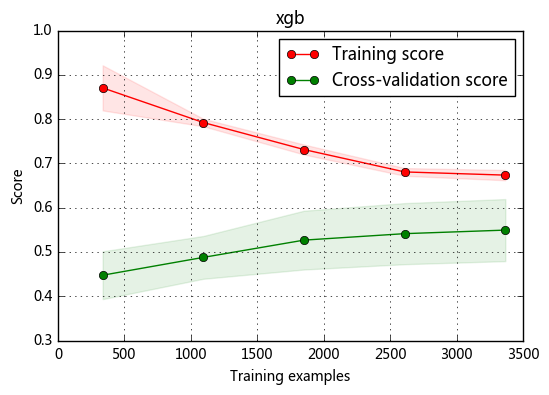

In [14]:
curve_helper.plot_learning_curve(xgb_model, 'xgb', X_all_train, y_all_train, cv=5)

In [15]:
xgb_model.fit(X_all_train, y_all_train)
y_pred = xgb_model.predict(munged_test_df.values)
output = pd.DataFrame({'id': munged_test_df.index, 'y': y_pred})
output.to_csv('../data/online/xgboost-pca-ica-grp-srp-6-9-1.csv', index=False)

In [22]:
y_pred

array([ 69.72631073,  83.14871979,  70.18686676, ...,  82.90158844,
        98.74907684,  83.40969849], dtype=float32)